FOLLOW UP ANALYSIS [ALMOST COMPLETE]

In this second analysis pipeline, we will find which indexes are most highly correlated with the forest fire area.

In [ ]:
import pandas as pd
df = pd.read_csv("../DATASETS/forestfires.csv")

Taking a first look at the data provided. There are too many 0 values, which we need to remove.

<Axes: xlabel='temp', ylabel='area'>

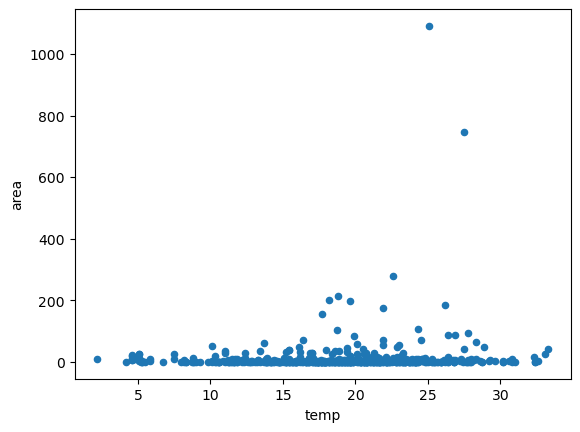

In [ ]:
import matplotlib.pyplot as plt
import math
df.plot.scatter(x="temp",y="area")

We can cut out the 0s, which improves our data spread.

/var/folders/15/6rx1884j37vf9fz_lh6lmnx40000gn/T/ipykernel_96016/995686286.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["area"] = df["area"].apply(lambda x: math.log(x))


<Axes: xlabel='temp', ylabel='area'>

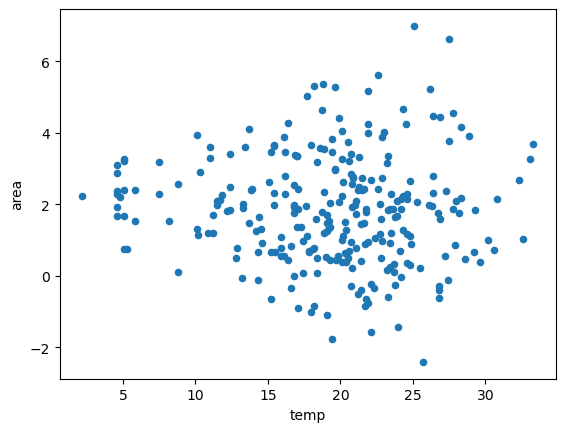

In [ ]:
df = df[df["area"] != 0]
df["area"] = df["area"].apply(lambda x: math.log(x))
df.plot.scatter(x = 'temp',y = 'area')
#area is transformed so that all zero vals are removed, and is log transformed

R, R^2 for FFMC: -0.045432891143094270.0020641475976202537
R, R^2 for DMC: 0.029487601459359020.0008695186398259921
R, R^2 for ISI: -0.110253209436570560.012155770191064293
R, R^2 for DC: -0.029070818695498920.0008451124996265696
R, R^2 for TEMP: -0.034501572657984190.0011903585158741623


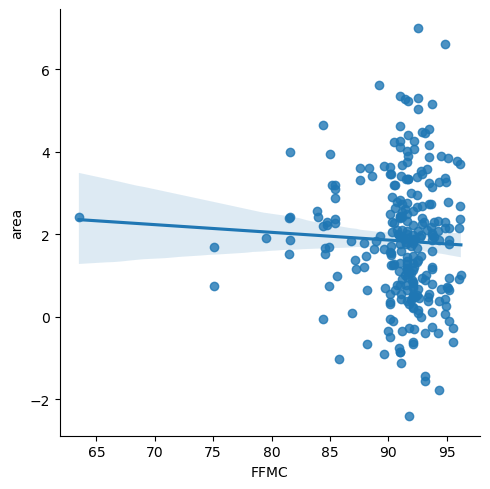

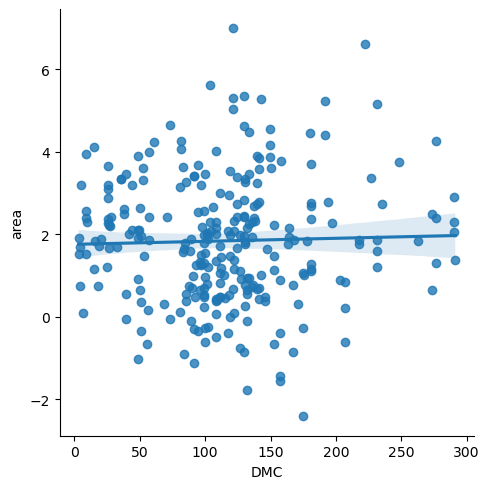

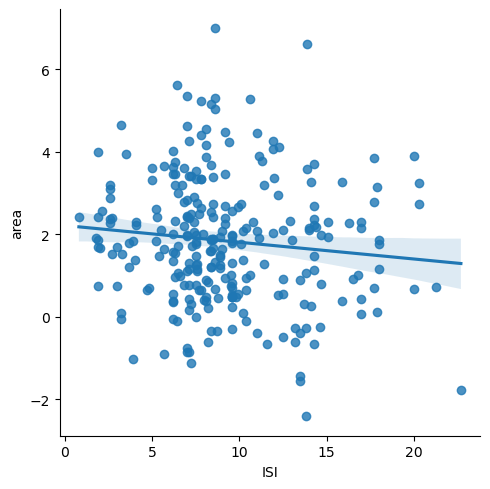

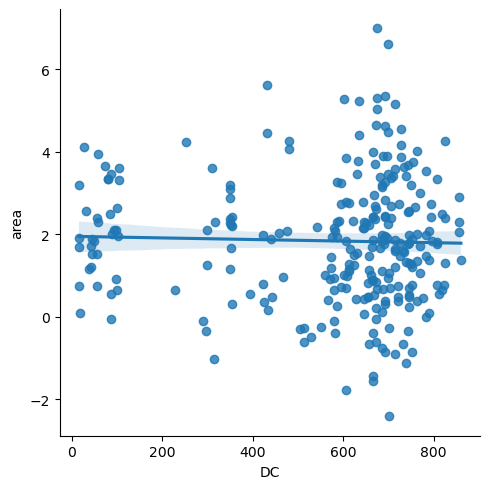

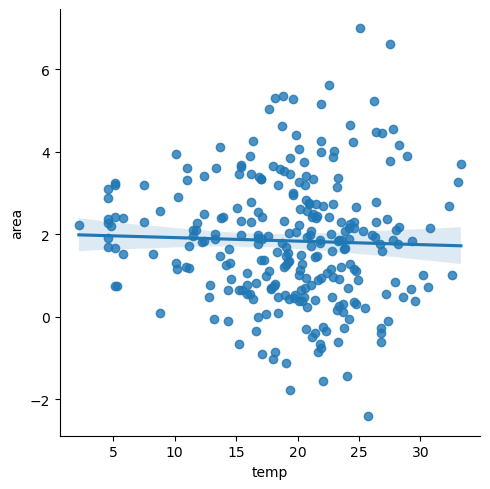

In [15]:
import seaborn as sns
sns.lmplot(x="FFMC",y='area',data=df,fit_reg=True)
sns.lmplot(x="DMC",y='area',data=df,fit_reg=True)
sns.lmplot(x="ISI",y='area',data=df,fit_reg=True)
sns.lmplot(x="DC",y='area',data=df,fit_reg=True)
sns.lmplot(x="temp",y='area',data=df,fit_reg=True)
print("R, R^2 for FFMC: "+ str((df["FFMC"].corr(df["area"]))) + str(df["FFMC"].corr(df["area"])**2))
print("R, R^2 for DMC: "+ str((df["DMC"].corr(df["area"]))) + str(df["DMC"].corr(df["area"])**2))
print("R, R^2 for ISI: "+ str((df["ISI"].corr(df["area"]))) + str(df["ISI"].corr(df["area"])**2))
print("R, R^2 for DC: "+ str((df["DC"].corr(df["area"]))) + str(df["DC"].corr(df["area"])**2))
print("R, R^2 for TEMP: "+ str((df["temp"].corr(df["area"]))) + str(df["temp"].corr(df["area"])**2))

Lets ask the question: For the worst fire case, what were the most relatively unusal indices? Lets start by calculating the mean and stdev for each index.

In [17]:
means = []
stdevs = []
identifiers = ["FFMC", "DMC", "ISI", "DC"]
for id in identifiers:
    means.append(df[id].mean())
    stdevs.append(df[id].std())
print(means)
print(stdevs)

[91.03407407407407, 114.70777777777778, 9.177037037037037, 570.867037037037]
[3.7090197096252417, 61.78651979599289, 4.147349953200341, 229.98124229821892]


We can use these statistics to calculate the z score of each index for the worst case. Lets identify the worst case.

In [ ]:
df.sort_values(by="area", ascending=False, inplace=True)
id_values = []
for id in identifiers:
    id_values.append(df.iloc[0][id])

z_vals = [(id_values[i] - means[i])/stdevs[i] for i in range(len(identifiers))]
print(z_vals)

[0.3952327139491116, 0.10345658314027226, -0.13913391528288113, 0.4501800317641157]


This shows that the day of, the DC index was the farthest from normal.